# Problem Statement

A Company wants to automate the loan eligibility process based on customer details provided while filling online application form. The details filled by the customer are Gender, Marital Status, Education, Number of Dependents, Income of self and co applicant, Required Loan Amount, Required Loan Term, Credit History and others. The requirements is to check eligibility of the Customer given the inputs described above.(Classification)

# Read Dataset

In [1]:
import pandas as pd
from warnings import filterwarnings
filterwarnings("ignore")
trd = pd.read_csv("E:/etlhive/datascience/mega project 2/loan/training_set.csv")
tsd = pd.read_csv("E:/etlhive/datascience/mega project 2/loan/testing_set.csv")

In [2]:
trd.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
tsd.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Profile

In [4]:
trd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


# Missing data treatment

In [5]:
con = []
cat = []
for i in trd.columns:
    if(trd[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [6]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [7]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [8]:
cat.remove("Loan_Status")

In [9]:
for i in cat:
    x = trd[i].mode()[0]
    trd[i] = trd[i].fillna(x)
    tsd[i] = tsd[i].fillna(x)
    
for i in con:
    x = trd[i].mean()
    trd[i] = trd[i].fillna(x)
    tsd[i] = tsd[i].fillna(x)

In [10]:
trd.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
tsd.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Outliers

In [12]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(trd[con]),columns=con)

In [13]:
out = []
for i in con:
    out = out + list(X1[(X1[i]>3)|(X1[i]<-3)].index)

In [14]:
from numpy import unique
outliers = list(unique(out))

In [15]:
trd = trd.drop(index=outliers,axis=0)

In [16]:
trd.shape

(577, 13)

In [17]:
trd.index = range(0,577,1)

In [18]:
trd

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,LP002978,Female,No,0,Graduate,No,2900.00000,0.0,71.000000,360.0,1.0,Rural,Y
573,LP002979,Male,Yes,3+,Graduate,No,4106.00000,0.0,40.000000,180.0,1.0,Rural,Y
574,LP002983,Male,Yes,1,Graduate,No,8072.00000,240.0,253.000000,360.0,1.0,Urban,Y
575,LP002984,Male,Yes,2,Graduate,No,7583.00000,0.0,187.000000,360.0,1.0,Urban,Y


# EDA

ANOVA

In [19]:
def ANOVA(df,cat,con):
    from statsmodels.formula.api import ols
    from statsmodels.stats.anova import anova_lm
    rel = con + " ~ " + cat
    model = ols(rel,df).fit()
    Q = anova_lm(model)
    pval = round(Q.iloc[0:1,4][0],4)
    return pval

In [20]:
ANOVA(trd,"Loan_Status","ApplicantIncome")

0.8943

In [21]:
ANOVA(trd,"Loan_Status","CoapplicantIncome")

0.2821

In [22]:
ANOVA(trd,"Loan_Status","LoanAmount")

0.3975

In [23]:
ANOVA(trd,"Loan_Status","Loan_Amount_Term")

0.6636

In [24]:
ANOVA(trd,"Loan_Status","Credit_History")

0.0

Chi square test

In [25]:
def chisquare(cat1,cat2,df):
    import pandas as pd
    Q = pd.crosstab(df[cat1],df[cat2])
    from scipy.stats import chi2_contingency
    a,b,c,d = chi2_contingency(Q)
    return a

Columns having less than 10 uniques are considered categorical columns

In [26]:
W = trd.nunique()
W1 = list(W[W<10].index)
W1.remove("Loan_Status")

In [27]:
for i in W1:
    e = chisquare(i,"Loan_Status",trd)
    e = round(e,2)
    print("Loan_Status ~",i,"--->",e)

Loan_Status ~ Gender ---> 0.09
Loan_Status ~ Married ---> 4.18
Loan_Status ~ Dependents ---> 1.95
Loan_Status ~ Education ---> 4.49
Loan_Status ~ Self_Employed ---> 0.25
Loan_Status ~ Loan_Amount_Term ---> 9.75
Loan_Status ~ Credit_History ---> 182.53
Loan_Status ~ Property_Area ---> 12.13


# Preprocessing

In [33]:
X_trd = trd.drop(labels=["Loan_ID","Loan_Status"],axis=1)
Y_trd = trd[["Loan_Status"]]

cat = []
con = []
for i in X_trd.columns:
    if(X_trd[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x1_trd = pd.DataFrame(mm.fit_transform(X_trd[con]),columns=con)
x2_trd = pd.get_dummies(X_trd[cat])
Xnew_trd = x1_trd.join(x2_trd)

In [34]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew_trd,Y_trd,test_size=0.2,random_state=21)

# Logistic

In [35]:
from warnings import filterwarnings
filterwarnings("ignore")

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)

In [38]:
tr_acc,ts_acc

(0.8156182212581344, 0.8448275862068966)

# Tree

In [39]:
def modeller(mo):
    model = mo.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = round(accuracy_score(ytrain,tr_pred),2)
    ts_acc = round(accuracy_score(ytest,ts_pred),2)
    return tr_acc,ts_acc

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21)
modeller(dtc)

(1.0, 0.68)

In [41]:
for i in range(2,20):
    dtc = DecisionTreeClassifier(random_state=21,max_depth=i)
    print(i,modeller(dtc))

2 (0.81, 0.84)
3 (0.83, 0.83)
4 (0.84, 0.81)
5 (0.85, 0.8)
6 (0.87, 0.8)
7 (0.9, 0.77)
8 (0.92, 0.73)
9 (0.95, 0.71)
10 (0.97, 0.69)
11 (0.98, 0.7)
12 (0.99, 0.7)
13 (1.0, 0.7)
14 (1.0, 0.68)
15 (1.0, 0.68)
16 (1.0, 0.68)
17 (1.0, 0.68)
18 (1.0, 0.68)
19 (1.0, 0.68)


In [42]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
modeller(knc)

(0.81, 0.75)

In [43]:
for i in range(2,20):
    knc = KNeighborsClassifier(n_neighbors=i)
    print(i,modeller(knc))

2 (0.9, 0.69)
3 (0.85, 0.75)
4 (0.86, 0.72)
5 (0.81, 0.75)
6 (0.8, 0.72)
7 (0.77, 0.7)
8 (0.79, 0.71)
9 (0.76, 0.73)
10 (0.76, 0.72)
11 (0.75, 0.74)
12 (0.76, 0.74)
13 (0.74, 0.75)
14 (0.74, 0.76)
15 (0.74, 0.77)
16 (0.74, 0.76)
17 (0.72, 0.77)
18 (0.73, 0.76)
19 (0.72, 0.77)


# Train the model with entire data in training set

In [44]:
dtc = DecisionTreeClassifier(random_state=21,max_depth=3)
finmodel = dtc.fit(Xnew_trd,Y_trd)

# Data preparation for testing set

In [45]:
xtrain.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [46]:
X_tsd = tsd.drop(labels=["Loan_ID"],axis=1)

cat = []
con = []
for i in X_tsd.columns:
    if(X_tsd[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [47]:
X1_tsd = pd.DataFrame(mm.transform(X_tsd[con]),columns=con)
X2_tsd = pd.get_dummies(X_tsd[cat])
Xnew_tsd = X1_tsd.join(X2_tsd)

In [48]:
pred_LS = finmodel.predict(Xnew_tsd)

# Final DF

In [49]:
Q = tsd[["Loan_ID"]]
Q["Loan_Status"]=pred_LS

In [53]:
Q.to_csv("C:/Users/lenovo/OneDrive/Desktop/Loan.csv")

In [54]:
Q.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


# If customer is not eligible for the input required amount and duration:- What can be amount for the given duration.(Regression)

In [55]:
Q['Amt']=tsd.LoanAmount

In [56]:
pred_set = Q[Q.Loan_Status == "N"]

In [57]:
pred_set

,Loan_ID,Loan_Status,Amt
7,LP001056,N,147.0
13,LP001094,N,166.0
35,LP001203,N,176.0
55,LP001313,N,130.0
58,LP001323,N,176.0
...,...,...,...
317,LP002774,N,67.0
325,LP002802,N,95.0
339,LP002858,N,162.0
346,LP002879,N,133.0


# Data Preparation

In [58]:
X_trd = trd.drop(labels=["Loan_ID","LoanAmount"],axis=1)
Y_trd = trd[["LoanAmount"]]

cat = []
con = []
for i in X_trd.columns:
    if(X_trd[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x1_trd = pd.DataFrame(mm.fit_transform(X_trd[con]),columns=con)
x2_trd = pd.get_dummies(X_trd[cat])
Xnew_trd = x1_trd.join(x2_trd)

In [59]:
Xnew_trd.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,0.277770,0.000000,0.6,1.0,0,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1
1,0.256155,0.167929,0.6,1.0,0,1,0,1,0,1,...,0,1,0,1,0,1,0,0,1,0
2,0.138909,0.000000,0.6,1.0,0,1,0,1,1,0,...,0,1,0,0,1,0,0,1,0,1
3,0.118585,0.262584,0.6,1.0,0,1,0,1,1,0,...,0,0,1,1,0,0,0,1,0,1
4,0.285129,0.000000,0.6,1.0,0,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1


In [60]:
Y_trd.head()

,LoanAmount
0,146.412162
1,128.000000
2,66.000000
3,120.000000
4,141.000000


In [61]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew_trd,Y_trd,test_size=0.2,random_state=21)

# Model

In [62]:
def modeller(mo):
    model = mo.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_squared_error
    tr_err = round(mean_squared_error(ytrain,tr_pred),2)
    ts_err = round(mean_squared_error(ytest,ts_pred),2)
    return tr_err,ts_err

# OLS

In [63]:
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             LoanAmount   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     22.76
Date:                Mon, 01 May 2023   Prob (F-statistic):           6.42e-44
Time:                        19:04:54   Log-Likelihood:                -2392.4
No. Observations:                 461   AIC:                             4815.
Df Residuals:                     446   BIC:                             4877.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      13.9879      2.534      5.520      0.000       9.008      18.968
ApplicantIncome           200.1983     14.762     13.561      0.000     171.186     229.211
CoapplicantIncome         132.7207     12.243     10.841      0.000     108.660     156.781
Loan_Amount_Term           19.8254     12.588      1.575      0.116      -4.913      44.564
Credit_History              7.3222      6.990      1.048      0.295      -6.415      21.060
Gender_Female               3.1186      3.360      0.928      0.354      -3.485       9.722
Gender_Male                10.8692      2.987      3.639      0.000       5.000      16.739
Married_No                  5.7381      2.912      1.970      0.049       0.014      11.462
Married_Yes                 8.2498      2.740      3.010      0.003       2.864      13.636
Dependents_0               -3.9844      3.483     -1.144      0.253     -10.829       2.860
Dependents_1                3.8337      4.570      0.839      0.402      -5.148      12.815
Dependents_2                1.2483      4.572      0.273      0.785      -7.736      10.233
Dependents_3+              12.8903      5.764      2.236      0.026       1.562      24.218
Education_Graduate         10.9738      2.902      3.781      0.000       5.270      16.677
Education_Not Graduate      3.0141      2.811      1.072      0.284      -2.510       8.538
Self_Employed_No            4.8488      3.099      1.565      0.118      -1.241      10.938
Self_Employed_Yes           9.1390      3.736      2.446      0.015       1.796      16.482
Property_Area_Rural         3.5874      3.278      1.094      0.274      -2.856      10.030
Property_Area_Semiurban     8.5047      2.987      2.847      0.005       2.634      14.375
Property_Area_Urban         1.8958      3.073      0.617      0.538      -4.145       7.936
Loan_Status_N              12.6528      2.777      4.556      0.000       7.195      18.110
Loan_Status_Y               1.3351      3.211      0.416      0.678      -4.975       7.645
==============================================================================
Omnibus:                       30.410   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.592
Skew:                           0.111   Prob(JB):                     7.14e-24
Kurtosis:                       5.345   Cond. No.                     3.79e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.97e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [64]:
ols.rsquared_adj

0.39835688550313686

In [65]:
col = ols.pvalues.sort_values().index[-1]

In [66]:
Xnew_trd = Xnew_trd.drop(labels=[col],axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew_trd,Y_trd,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst).fit()
col = ols.pvalues.sort_values().index[-1]
print(ols.rsquared_adj,col)

0.39835688550313697 Dependents_1


In [67]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
modeller(lm)

(1885.81, 1956.55)

In [68]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=21,max_depth=2)
modeller(dtr)

(1891.73, 2555.54)

In [69]:
tr = []
ts = []
for i in range(2,20):
    dtr = DecisionTreeRegressor(random_state=21,max_depth=i)
    tre,tse = modeller(dtr)
    tr.append(tre)
    ts.append(tse)

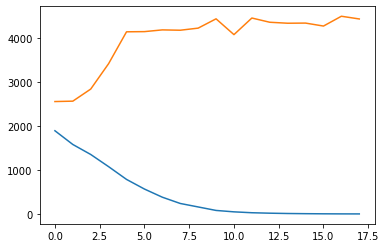

In [70]:
import matplotlib.pyplot as plt
plt.plot(tr)
plt.plot(ts)

In [71]:
dtr = DecisionTreeRegressor(random_state=21,max_depth=2)
modeller(dtr)

(1891.73, 2555.54)

In [72]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=21,max_depth=2)
modeller(rfr)

(1722.79, 2220.47)

# Final Prediction

In [73]:
tsd['Loan_Status']=pred_LS

In [74]:
tsdnew = tsd.drop(labels=["Loan_ID","LoanAmount"],axis=1)

In [75]:
cat = []
con = []
for i in X_trd.columns:
    if(X_trd[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x1_trd = pd.DataFrame(mm.fit_transform(X_trd[con]),columns=con)
x2_trd = pd.get_dummies(X_trd[cat])
Xnew_trd = x1_trd.join(x2_trd)

In [76]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(Xnew_trd,Y_trd)

In [77]:
cat = []
con = []
for i in tsdnew.columns:
    if(tsdnew[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x1_trd = pd.DataFrame(mm.fit_transform(tsdnew[con]),columns=con)
x2_trd = pd.get_dummies(tsdnew[cat])
Xnew_tsd = x1_trd.join(x2_trd)

In [78]:
len(Xnew_tsd.columns)

21

In [86]:
predicted_loanAmt = model.predict(Xnew_tsd)

In [87]:
list(predicted_loanAmt)

[array([88.9375]),
 array([99.1875]),
 array([105.59375]),
 array([101.46875]),
 array([70.21875]),
 array([90.65625]),
 array([74.5]),
 array([95.5]),
 array([111.625]),
 array([84.75]),
 array([69.71875]),
 array([101.0625]),
 array([83.625]),
 array([125.28125]),
 array([78.375]),
 array([93.375]),
 array([110.3125]),
 array([107.125]),
 array([140.34375]),
 array([81.375]),
 array([89.6875]),
 array([64.8125]),
 array([78.8125]),
 array([64.75]),
 array([111.09375]),
 array([194.59375]),
 array([100.28125]),
 array([113.625]),
 array([91.5625]),
 array([75.90625]),
 array([65.46875]),
 array([103.90625]),
 array([90.1875]),
 array([95.03125]),
 array([88.75]),
 array([85.875]),
 array([111.125]),
 array([94.4375]),
 array([84.5625]),
 array([88.40625]),
 array([92.96875]),
 array([71.21875]),
 array([86.03125]),
 array([104.]),
 array([71.28125]),
 array([103.46875]),
 array([85.5625]),
 array([82.]),
 array([103.125]),
 array([112.]),
 array([98.4375]),
 array([102.125]),
 array([

In [88]:
Q = tsd[["Loan_ID"]]
Q["Loan_Amount"]=predicted_loanAmt
Q.to_csv("C:/Users/lenovo/OneDrive/Desktop/Loan.csv")